# SAPSO library - a demonstration

This library allows to easily run SA and PSO experiments while providing convenient 2D plotting functions.
Cells below demonstrate a possible workflow.

In [1]:
import numpy as np

from sapso.sa import simulated_annealing
from sapso.plot import contour_plot
from sapso.test import ackley, sphere, beale, himmelblau

## Demo: Simulated Annealing

In [2]:
# NOTE: choice of objective function requires to change the area
#       see `sapso.test` for bounds and the global optimum

# NOTE: c.f. TODO in `sapso.sa`, 
#       the objective `beale` with default SA kwargs
#       finds an optimum outside of the `area` region.
#       In my opinion, this should not be allowed.


objective = himmelblau
area = np.array([[-4.5, 4.5], [-4.5, 4.5]])

# default params
kwargs_sa = {
    'temperature': None,  # uses default cooling scheme
    'iterations' : 5000,
    'step_size'  : 0.1,
    'seed'       : 42,
    'goal'       : 'min'  # 'min'/'max' for minimization/maximization
}

# optimize by simulated annealing
history = simulated_annealing(
    objective, area, **kwargs_sa
)

In [3]:
# examine output of simulated_annealing()
print(f"`history` has keys: {list(history.keys())}")
print(f"optimum at {history['p_best']} with value {history['f_best']:.4}")

`history` has keys: ['points', 'values', 'p_best', 'f_best']
optimum at [-2.80601634  3.13076389] with value 3.896e-05


## Demo: plotting results

In [4]:
import matplotlib.pyplot as plt

## Example: single plot

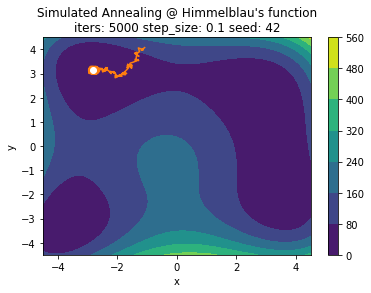

In [5]:
contour_plot(
    objective, area, history, 
    resolution=100, 
    ax=None,
    title="Simulated Annealing @ Himmelblau's function\n"
          f"iters: {kwargs_sa['iterations']} step_size: {kwargs_sa['step_size']} seed: {kwargs_sa['seed']}"
)

# save figure if desired
if False:
    plt.savefig('plots/example_single.png')

## Example: multiple plots

This is one possibility to create comparison plots.
For the sake of simplicity, the same plot is repeated multiple times.
In reality, the plots are different SA or PSO experiments.

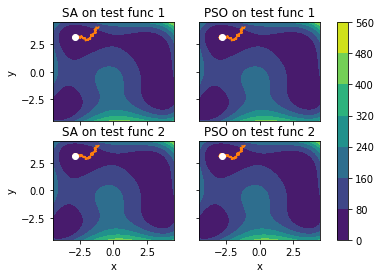

In [6]:
fig, axes = plt.subplots(2,2)

kwargs_plot = {
    'resolution': 100    
}

# run SA experiment 1, this gives history of SA

cbar = contour_plot(
    objective, area, history,  
    ax=axes[0, 0],
    title=f'SA on test func 1',
    **kwargs_plot
)

# run PSO experiment 1, this gives history of PSO

_ = contour_plot(
    objective, area, history, 
    ax=axes[0, 1],
    title=f'PSO on test func 1',
    **kwargs_plot
)

# run SA experiment 2, this gives history of SA

_ = contour_plot(
    objective, area, history, 
    ax=axes[1, 0],
    title=f'SA on test func 2',
    **kwargs_plot
)

# run PSO experiment 2, this gives history of PSO

_ = contour_plot(
    objective, area, history,  
    ax=axes[1, 1],
    title=f'PSO on test func 2',
    **kwargs_plot
)

# add colorbar to figure once
fig.colorbar(cbar, ax=axes.ravel().tolist())

# set labels for each subplot
for ax in axes.flat:
    ax.set(xlabel='x', ylabel='y')

# hide x labels and tick labels for top plots and y ticks for right plots
for ax in axes.flat:
    ax.label_outer()
    
# save figure if desired
if False:
    plt.savefig('plots/example_multiple.png')